In [1]:
import pandas as pd
import numpy as np
import os as os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Industry way - Same step, sligthly different 

filepath = r"C:\Users\pramo\Desktop\Programming Learning\Python\Data"
filename = "Salary_Data.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [5]:
data.shape

(30, 2)

In [6]:
data.isnull().sum()  # Missing values

YearsExperience    0
Salary             0
dtype: int64

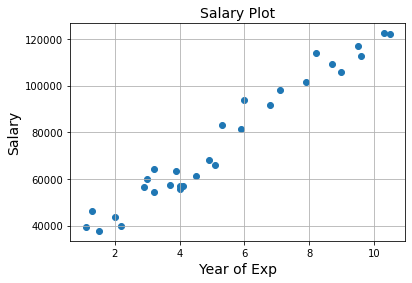

In [12]:
plt.scatter(data["YearsExperience"], data["Salary"])
plt.xlabel("Year of Exp", fontsize = 14)
plt.ylabel("Salary", fontsize = 14)
plt.title("Salary Plot", fontsize = 14)
plt.grid()
plt.show()

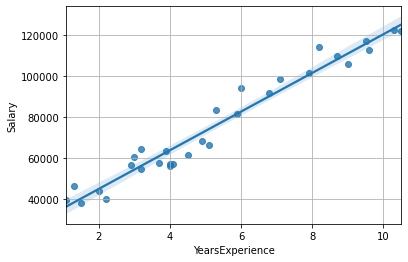

In [13]:
# To get regression line in scatter plot

sns.regplot(x = "YearsExperience", y = "Salary", data = data)
plt.grid()
plt.show()

In [14]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [15]:
# To arrange data as per Regression Algo. usage

X = data[["YearsExperience"]]    # Input data 
y = data[["Salary"]]             # Output data

In [16]:
import statsmodels.api as sm      # Package that have regression model

In [17]:
X_1 = sm.add_constant(X)    # Adds Intercept 

In [18]:
X_1.head()

,const,YearsExperience
0,1.0,1.1
1,1.0,1.3
2,1.0,1.5
3,1.0,2.0
4,1.0,2.2


In [19]:
lm = sm.OLS(y, X_1)        # Creates function
lm = lm.fit()              # Get best fit line output

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        14:42:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lm.params.round(2)

const              25792.20
YearsExperience     9449.96
dtype: float64

In [34]:
lm.params[0].round(0)

25792.0

In [36]:
input_exp = 20

In [37]:
output = lm.params[0] + lm.params[1]*input_exp 
output

214791.44662777026

In [39]:
round(214791.44662777026, 2)

214791.45